In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import scipy.stats as ss
import nltk


In [3]:
df = pd.read_csv('Autism-Adult-Data.csv')
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Age_desc,Relation,ASD
0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0,26.0,f,White-European,no,no,'United States',no,'18 and more',Self,NO
1,1.0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,24.0,m,Latino,no,yes,Brazil,no,'18 and more',Self,NO
2,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,27.0,m,Latino,yes,yes,Spain,no,'18 and more',Parent,YES
3,1.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,35.0,f,White-European,no,yes,'United States',no,'18 and more',Self,NO
4,1.0,0.0,0.0,0.0,0,0.0,0.0,1.0,0.0,0.0,40.0,f,NaN,no,no,Egypt,no,'18 and more',NaN,NO


### Data has 704 instances with 19 features with 26.84% of the data are diagnosed with ASD - Consider class imbalance problem in modelling

In [4]:
df.shape

(704, 20)

In [5]:
df.describe()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age
count,700.000000,701.000000,701.000000,701.000000,704.000000,702.000000,699.00000,703.000000,701.000000,703.000000,698.000000
mean,0.724286,0.453638,0.456491,0.495007,0.498580,0.284900,0.41774,0.648649,0.323823,0.574680,29.710602
std,0.447193,0.498201,0.498459,0.500332,0.500353,0.451689,0.49354,0.477732,0.468268,0.494743,16.542781
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,17.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,21.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000,1.000000,27.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,35.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,383.000000


In [6]:
df['ASD'].value_counts()

NO     515
YES    189
Name: ASD, dtype: int64

In [7]:
print('Number of ASD: {}, Number of No ASD - {}. \nProportion ASD/None: {}%'.format(189, 515, 189/(515 + 189)*100))

Number of ASD: 189, Number of No ASD - 515. 
Proportion ASD/None: 26.84659090909091%


In [8]:
len(df['ASD'].unique())

2

# Part 1: Data Exploration
Brief overview of the unique values and the distribution of each feature's values

In [9]:
for col in df.columns:
    print(col)
    print('Number of unique values: {}'.format(len(df[col].unique())))
    print(df[col].value_counts())
    print('\n')

A1_Score
Number of unique values: 3
1.0    507
0.0    193
Name: A1_Score, dtype: int64


A2_Score
Number of unique values: 3
0.0    383
1.0    318
Name: A2_Score, dtype: int64


A3_Score
Number of unique values: 3
0.0    381
1.0    320
Name: A3_Score, dtype: int64


A4_Score
Number of unique values: 3
0.0    354
1.0    347
Name: A4_Score, dtype: int64


A5_Score
Number of unique values: 2
0    353
1    351
Name: A5_Score, dtype: int64


A6_Score
Number of unique values: 3
0.0    502
1.0    200
Name: A6_Score, dtype: int64


A7_Score
Number of unique values: 3
0.0    407
1.0    292
Name: A7_Score, dtype: int64


A8_Score
Number of unique values: 3
1.0    456
0.0    247
Name: A8_Score, dtype: int64


A9_Score
Number of unique values: 3
0.0    474
1.0    227
Name: A9_Score, dtype: int64


A10_Score
Number of unique values: 3
1.0    404
0.0    299
Name: A10_Score, dtype: int64


Age
Number of unique values: 47
21.0     48
20.0     45
23.0     37
22.0     37
19.0     35
24.0     34
27.0    

## Data Visualization

In [10]:
idx = df[df['Age'] == 383].index
df.drop(index = idx, inplace = True)

#### Data seems to be collected from Western and developed countries or more populous countries

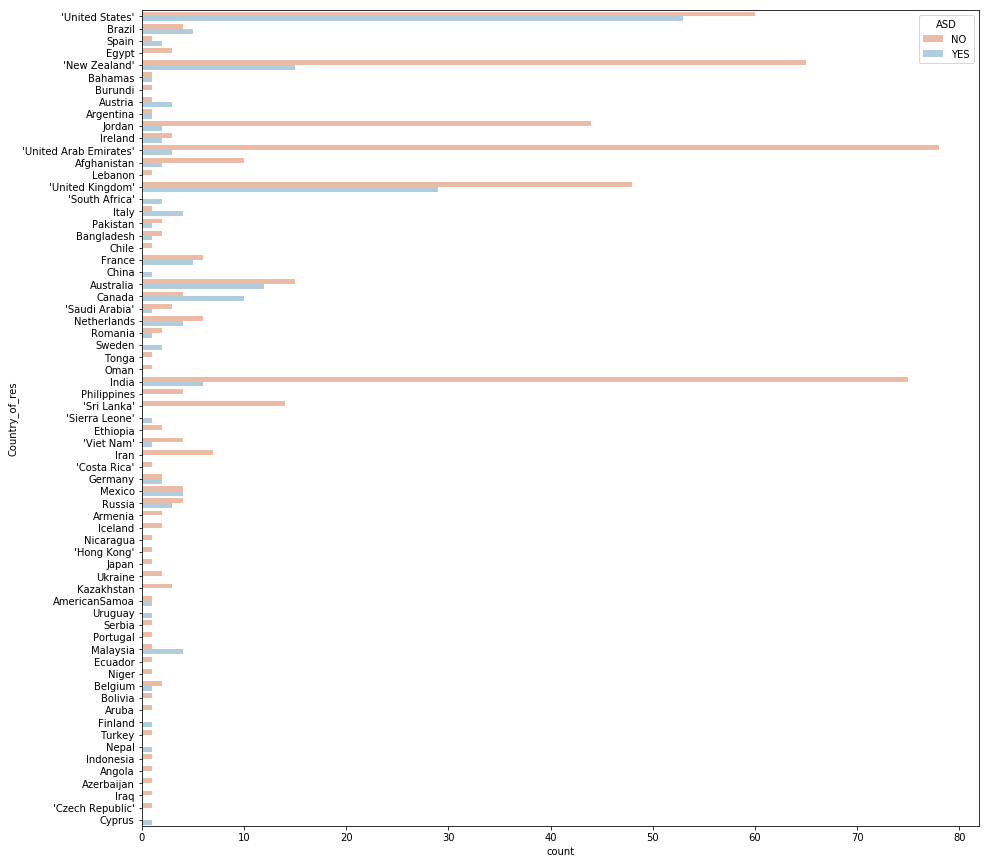

In [11]:
# df.groupby(['Country_of_res','ASD']).size().plot(kind='barh')
plt.figure(figsize=(15, 15))
sns.countplot(y='Country_of_res', hue='ASD', data=df ,palette='RdBu')

#### Majority of the data is White-European, Asian, and Middle Eastern

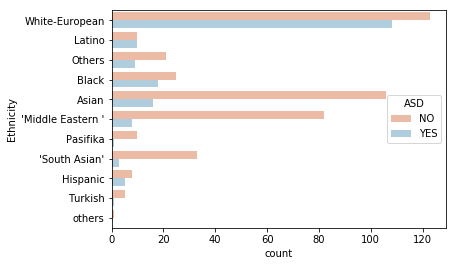

In [12]:
sns.countplot(y='Ethnicity', hue='ASD', data=df ,palette='RdBu')

#### Gender distribution looks equal

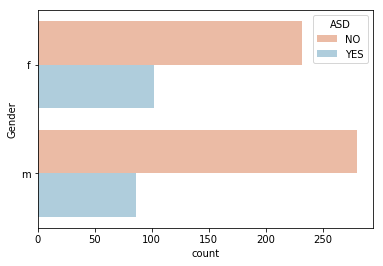

In [13]:
sns.countplot(y='Gender', hue='ASD', data=df ,palette='RdBu')

#### Distribution of Age grouped by ASD and Gender - There's not much difference between the groups

/Users/duytienpham/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


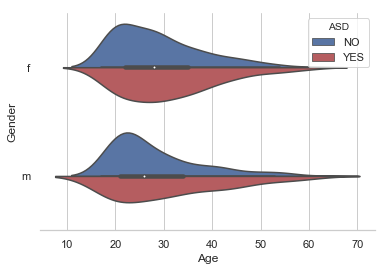

In [14]:
sns.set(style="whitegrid", color_codes=True)
sns.violinplot(x="Age", y="Gender", hue="ASD", split = True, data=df, palette={'YES': "r",  'NO': "b"})
sns.despine(left=True)

#### Distribution of Age grouped by Jaundice and ASD. ASD with Jaundice follows normal distribution while noASD with no Jaundice is more skewed to the right.
- Note: 69 people with Jaundice - 631 without Jaundice

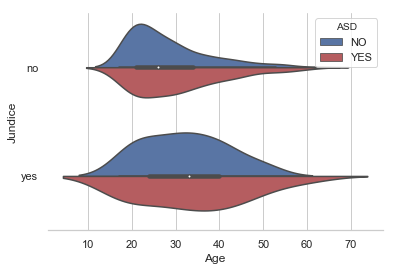

In [15]:
sns.violinplot(x="Age", y="Jundice", hue="ASD", split = True, data=df, palette={'YES': "r",  'NO': "b"})
sns.despine(left=True)

#### Notice that there is no common pattern regarding the who diagnoses the symptoms
- 80% self-diagnosed

[Text(0, 0, 'Self'),
 Text(0, 0, 'Parent'),
 Text(0, 0, "'Health care professional'"),
 Text(0, 0, 'Relative'),
 Text(0, 0, 'Others')]

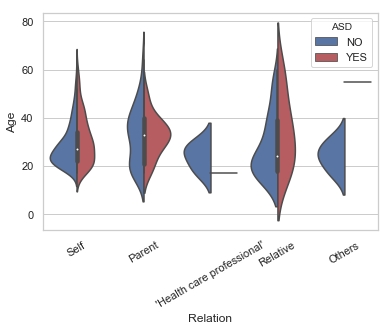

In [16]:
ax = sns.violinplot(x="Relation", y="Age", hue="ASD",split = True, data=df, palette= {'YES': "r",  'NO': "b"})
# sns.despine(left=True)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)

# Part 2: Data Preprocessing

### 1) Missing Data

Number of missing data for each column

In [17]:
df.isna().sum()/df.shape[0] 

A1_Score           0.005690
A2_Score           0.004267
A3_Score           0.004267
A4_Score           0.004267
A5_Score           0.000000
A6_Score           0.002845
A7_Score           0.007112
A8_Score           0.001422
A9_Score           0.004267
A10_Score          0.001422
Age                0.008535
Gender             0.004267
Ethnicity          0.142248
Jundice            0.005690
Family             0.007112
Country_of_res     0.005690
Used_app_before    0.004267
Age_desc           0.005690
Relation           0.137980
ASD                0.000000
dtype: float64

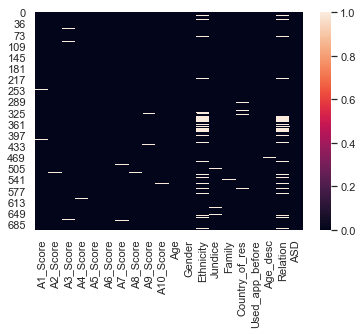

In [18]:
sns.heatmap(df.isnull())

### 2) Clean up

### a) Drop Age_desc because Age already describes this info.
- Drop any rows NaN except for ones in Ethnicity and Relation
- Hypothesis: Country of Residence and Ethnicity play a role in ASD - convert country of residence to region instead to reduce dimensionality

In [19]:
clean_cols = list(set(df.columns) - {'Ethnicity', 'Relation'})
df.dropna(subset = clean_cols, inplace = True)

In [20]:
df['Ethnicity'].fillna('unknown', inplace = True)
df['Relation'].fillna(df['Relation'].mode(), inplace = True)
df.drop(columns = ['Age_desc'], inplace = True)
df.dropna(inplace = True)

### b) Region for countries dataset

In [21]:
#############################################
continents = pd.read_csv('countryContinent.csv', engine = 'python')
continents = continents[['country','sub_region']]
continent_dict = dict(zip(continents.country.tolist(), continents.sub_region.tolist()))

In [22]:
continents.head()

,country,sub_region
0,Afghanistan,Southern Asia
1,�land Islands,Northern Europe
2,Albania,Southern Europe
3,Algeria,Northern Africa
4,American Samoa,Polynesia


In [23]:
continent_country_lst = continents['country'].tolist()
df_countries = list(set(df['Country_of_res'].tolist()))
region_dict = {}
#apply jaccard distance to find the closest similar string
for c in df_countries:
    jaccard = [nltk.jaccard_distance(set(c),set(country)) for country in continent_country_lst]
    region = continent_dict[continent_country_lst[jaccard.index(min(jaccard))]]
    region_dict[c] = region

region_dict["'United States'"] = 'Northern America'
region_dict["Slovakia"] = 'Eastern Europe'
region_dict["Russia"] = 'Eastern Europe'

#############################################
df['Country_of_res'] = df['Country_of_res'].apply(lambda x: region_dict[x])

In [24]:
df.head()

,A1_Score,A2_Score,A3_Score,A4_Score,A5_Score,A6_Score,A7_Score,A8_Score,A9_Score,A10_Score,Age,Gender,Ethnicity,Jundice,Family,Country_of_res,Used_app_before,Relation,ASD
0,1.0,1.0,1.0,1.0,0,0.0,1.0,1.0,0.0,0.0,26.0,f,White-European,no,no,Northern America,no,Self,NO
1,1.0,1.0,0.0,1.0,0,0.0,0.0,1.0,0.0,1.0,24.0,m,Latino,no,yes,South America,no,Self,NO
2,1.0,1.0,0.0,1.0,1,0.0,1.0,1.0,1.0,1.0,27.0,m,Latino,yes,yes,Southern Europe,no,Parent,YES
3,1.0,1.0,0.0,1.0,0,0.0,1.0,1.0,0.0,1.0,35.0,f,White-European,no,yes,Northern America,no,Self,NO
5,1.0,1.0,1.0,1.0,1,0.0,1.0,1.0,1.0,1.0,36.0,m,Others,yes,no,Northern America,no,Self,YES


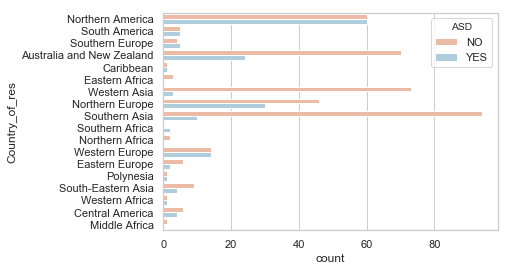

In [25]:
sns.countplot(y='Country_of_res', hue='ASD', data=df ,palette='RdBu')

### c) Check multicollinearity among the categorical variables

In [26]:
def cramers_corrected_stat(confusion_matrix):
    chi2,p_value,dof,_ = ss.chi2_contingency(confusion_matrix)
#     print('dof: ',dof)
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1))), p_value, dof

In [27]:
cols = df.columns[:-1]
correlation_matrix = np.zeros((len(cols),len(cols)))
p_matrix = np.zeros((len(cols),len(cols)))
dof_matrix =  np.zeros((len(cols),len(cols)))
for i in range(len(cols)):
    if i + 1 <len(cols):
        for j in range(0,len(cols)):
            contigency_table = pd.crosstab(df.iloc[:,i], df.iloc[:,j])
            cramer, pvalue, dof = cramers_corrected_stat(contigency_table)
            if cramer < 0.4:
                val = 0
            else:
                val = cramer
            correlation_matrix[i,j] += val
            if pvalue < 0.05:
                p_matrix[i,j] += 1
            else:
                continue
            dof_matrix[i,j] += dof
    else:
        break

### d) Plot out the correlation matrix for categorical variables (based on Cramer's V and p-value) and see if there is any strong correlation among them

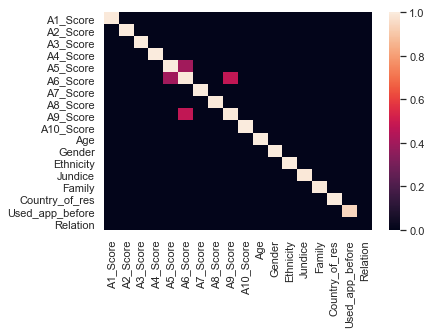

In [28]:
sns.heatmap(correlation_matrix, xticklabels = cols, yticklabels = cols)

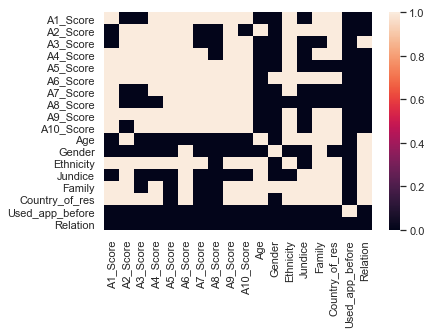

In [29]:
sns.heatmap(p_matrix, xticklabels = cols, yticklabels = cols)

### e) No strong correlation among the categorical variables - Convert the values to binary and creat one hot encoding

In [30]:
df['ASD'] = df['ASD'].apply(lambda x: 1 if x == 'YES' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'f' else 0)
df['Jundice'] = df['Jundice'].apply(lambda x: 1 if x == 'yes' else 0)
df['Family'] = df['Family'].apply(lambda x: 1 if x == 'yes' else 0)
df['Used_app_before'] = df['Used_app_before'].apply(lambda x: 1 if x == 'yes' else 0)

In [31]:
asd_status = df[['ASD']]
df = pd.concat([df, pd.get_dummies(df['Relation'], prefix = 'Relation')], axis = 1)
df = pd.concat([df, pd.get_dummies(df['Ethnicity'], prefix = 'Ethnicity')], axis = 1)
df = pd.concat([df, pd.get_dummies(df['Country_of_res'], prefix = 'Region')], axis = 1)
df.drop(columns = ['ASD','Relation','Ethnicity','Country_of_res'], inplace = True)
df = pd.concat([df, asd_status], axis = 1)

# Part 3: Model Training

In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix

In [33]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

## a) Logistic Regression

In [34]:
logreg = LogisticRegression(class_weight = dict(Counter(df['ASD'].tolist())))
logreg.fit(X_train, y_train)
y_val_logreg = logreg.predict(X_val)
f1_score(y_val, y_val_logreg)

/Users/duytienpham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9433962264150945

#### a) Confusion Matrix for the validation set

In [35]:
confusion_matrix(y_val, y_val_logreg)

array([[62,  3],
       [ 0, 25]])

#### b) Prediction and Evaluation on Test set

In [36]:
y_test_logreg = logreg.predict(X_test)
confusion_matrix(y_test, y_test_logreg)

array([[82,  1],
       [ 0, 30]])

In [37]:
f1_score(y_test, y_test_logreg)

0.9836065573770492

## b) Random Forest

#### a) Parameter tuning and Validation evaluation

In [38]:
rf = RandomForestClassifier(class_weight = dict(Counter(df['ASD'].tolist())))
rf.fit(X_train, y_train)
y_val_rf = rf.predict(X_val)
f1_score(y_val, y_val_rf)

/Users/duytienpham/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.8979591836734694

In [39]:
confusion_matrix(y_val, y_val_rf)

array([[63,  2],
       [ 3, 22]])

#### b) Prediction and Evaluation on Test set

In [40]:
y_test_rf = rf.predict(X_test)
confusion_matrix(y_test, y_test_rf)

array([[82,  1],
       [ 6, 24]])

In [41]:
f1_score(y_test, y_test_rf)

0.8727272727272728

## c) Decision Tree

In [42]:
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.externals.six import StringIO  
import pydot 

In [43]:
dt = DecisionTreeClassifier(class_weight = dict(Counter(df['ASD'].tolist())))
dt.fit(X_train, y_train)
y_val_dt = dt.predict(X_val)
f1_score(y_val, y_val_dt)

0.7843137254901961

In [44]:
confusion_matrix(y_val, y_val_dt)

array([[59,  6],
       [ 5, 20]])

#### Prediction and Evaluation on Test Set

In [45]:
y_test_dt = rf.predict(X_test)
confusion_matrix(y_test, y_test_dt)

array([[82,  1],
       [ 6, 24]])

In [46]:
f1_score(y_test, y_test_dt)

0.8727272727272728

# Part 4: Evaluation for the three models

In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

# Instantiate the classfiers and make a list
classifiers = [logreg, rf, dt]

# Define a result table as a DataFrame
result_table = pd.DataFrame(columns=['classifiers', 'fpr','tpr','auc'])

# Train the models and record the results
for clf in classifiers:
    model = clf.fit(X_train, y_train)
    yproba = model.predict_proba(X_test)[::,1]
    
    fpr, tpr, _ = roc_curve(y_test, yproba)
    auc = roc_auc_score(y_test, yproba)
    
    result_table = result_table.append({'classifiers':clf.__class__.__name__,
                                        'fpr':fpr, 
                                        'tpr':tpr, 
                                        'auc':auc}, ignore_index=True)

# Set name of the classifiers as index labels
result_table.set_index('classifiers', inplace=True)

/Users/duytienpham/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


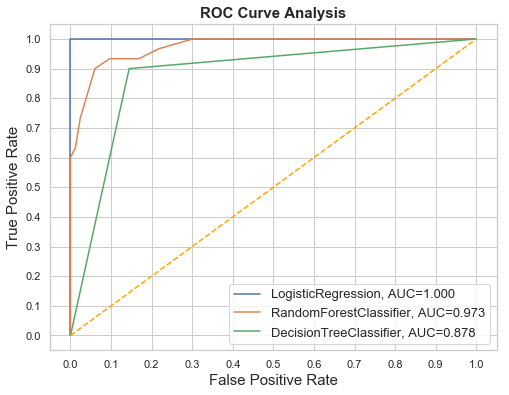

In [48]:
fig = plt.figure(figsize=(8,6))

for i in result_table.index:
    plt.plot(result_table.loc[i]['fpr'], 
             result_table.loc[i]['tpr'], 
             label="{}, AUC={:.3f}".format(i, result_table.loc[i]['auc']))
    
plt.plot([0,1], [0,1], color='orange', linestyle='--')

plt.xticks(np.arange(0.0, 1.1, step=0.1))
plt.xlabel("False Positive Rate", fontsize=15)

plt.yticks(np.arange(0.0, 1.1, step=0.1))
plt.ylabel("True Positive Rate", fontsize=15)

plt.title('ROC Curve Analysis', fontweight='bold', fontsize=15)
plt.legend(prop={'size':13}, loc='lower right')

plt.show()

#### Below is the coefficients of the Logistic Regression:
- Considering feature A1_Score, if the person answer 'Yes' to A1, then the odds of having ASD is exp(7.165) times greater
- Considering feature A1_Score, if the person answer 'Yes' to A2, then the odds of having ASD is exp(6.312) times greater

In [49]:
pd.concat([pd.DataFrame(X.columns),pd.DataFrame(np.transpose(logreg.coef_))], axis = 1)

,0,0
0,A1_Score,7.165500
1,A2_Score,6.312365
2,A3_Score,5.835827
3,A4_Score,6.488188
4,A5_Score,6.976953
5,A6_Score,6.600812
6,A7_Score,5.915609
7,A8_Score,4.329959
8,A9_Score,6.516563
9,A10_Score,5.766433
